# Final Assignment
## Students Performance in Exam
**Name**: Vincent Zagala



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
# Importing packages

In [20]:
df = pd.read_csv("data.csv")
# Loading Data

### Main Problem

#### Predicting student math scores based on demographic and course-related attributes using supervised learning

### EDA

In [21]:
# Missing Values Check
print("\nMissing Values:")
print(df.isnull().sum())

# Data Types
print("\nData Types:")
print(df.dtypes)


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [22]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Visualizing Categorical Features

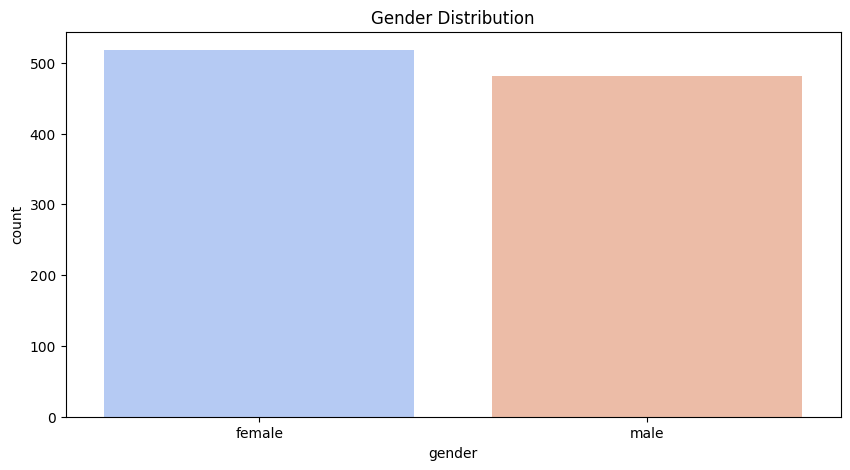

In [23]:
# Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="gender", hue="gender", palette="coolwarm", legend=False)
plt.title("Gender Distribution")
plt.show()

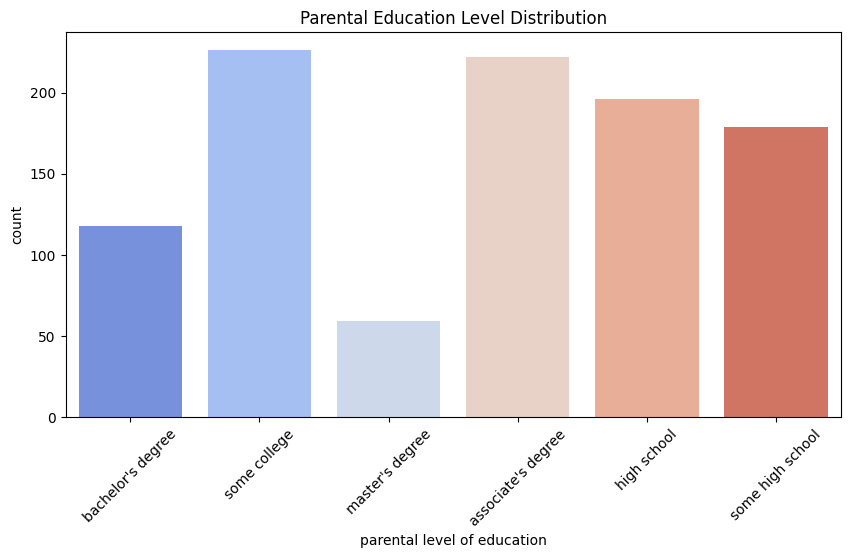

In [24]:
# Level of Education of the Parents
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="parental level of education", hue="parental level of education", palette="coolwarm", legend=False)
plt.title("Parental Education Level Distribution")
plt.xticks(rotation=45)
plt.show()

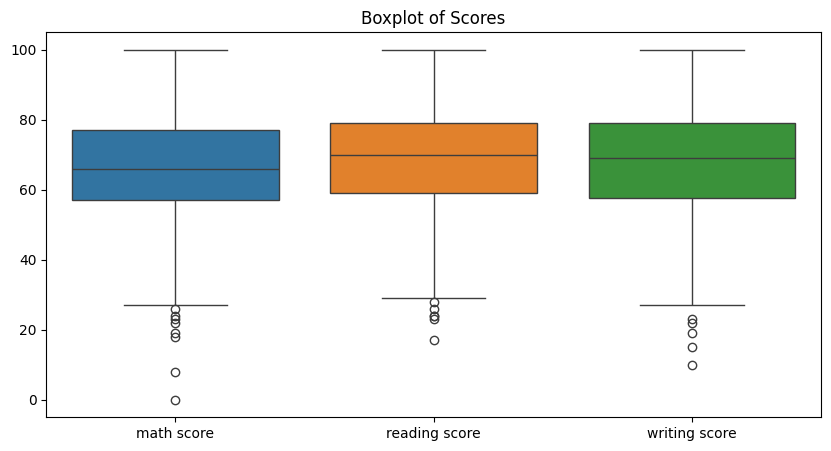

In [25]:
# Score Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["math score", "reading score", "writing score"]])
plt.title("Boxplot of Scores")
plt.show()

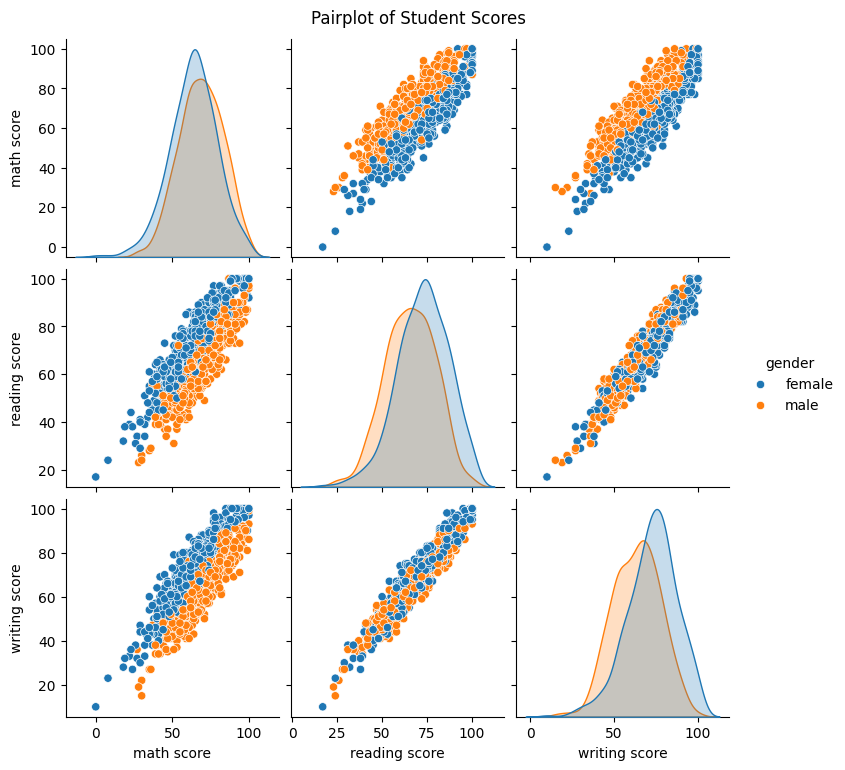

In [26]:
# Pairplot for Score Relationships
sns.pairplot(df, hue="gender", diag_kind="kde")
plt.suptitle("Pairplot of Student Scores", y=1.02)
plt.show()

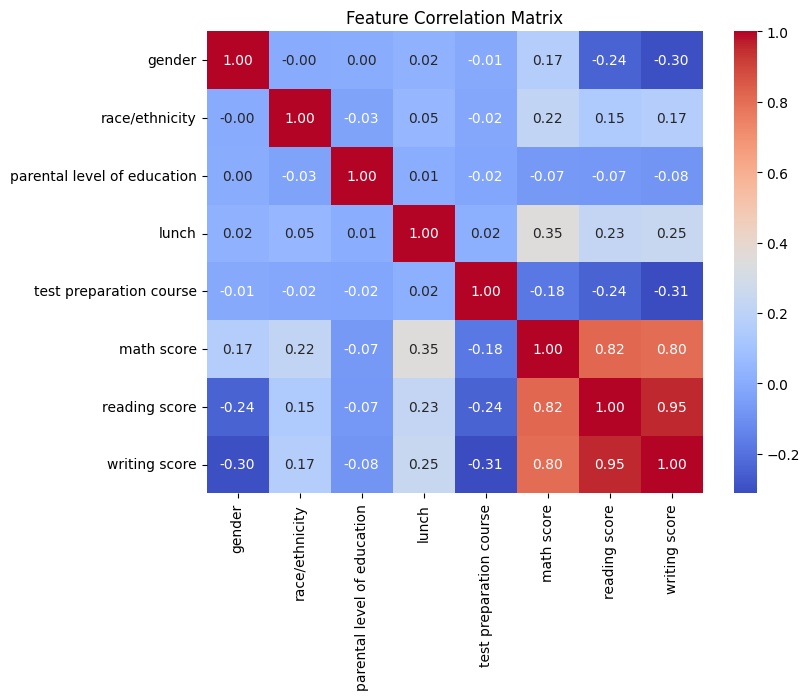

In [27]:
# categorical columns
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity']) 
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education']) 
df['lunch'] = label_encoder.fit_transform(df['lunch']) 
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course']) 


# correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


### Data Preprocessing
Splitting the data into training and testing sets for model validation

In [28]:
# features and target
X = df.drop("math score", axis=1)  # Features (exclude math score)
y = df["math score"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# training data beign fit with the model
rf_model.fit(X_train, y_train)

# test set prediction
y_pred = rf_model.predict(X_test)

# Calculating the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 4.70082380952381
Mean Squared Error: 36.79422162429139
R-squared: 0.8487940184356789


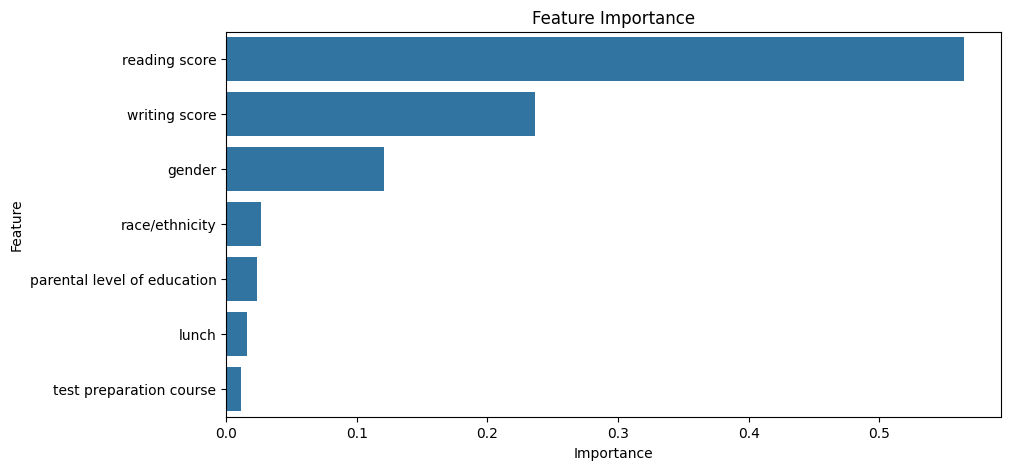

                       Feature  Importance
5                reading score    0.565059
6                writing score    0.236134
0                       gender    0.120868
1               race/ethnicity    0.026877
2  parental level of education    0.023319
3                        lunch    0.016024
4      test preparation course    0.011719


In [30]:
# feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# display feature importance
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# plotting
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()
print(importance_df)


- Most Important Features: The reading score and writing score are the most influential features for predicting math scores

- Minor Features: Gender, race/ethnicity, and parental level of education contribute less but still have some impact.

- Negligible Features: Lunch and test preparation course have very low importance

In [31]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30, None]
}

grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 200}


- Max Depth of 10

- 200 Estimators: A higher number of trees or estimators improves the model's performance


#### Why Random Forest? 

- Since in this case Student Performance has multiple factors such as (parental education, test prep, gender, etc.)

- RandomForest can catch the complex relationships better than other models,

- Categorical variables is in this dataset so Random Forest can handle both numerical and categorical variables. 

- Feature importance scores can be used with Random Forest. 





### Conclusion

- Frame work used is Random Forest Regressor.

- Reading and writing scores are the most significant predictors since the overall performance is correlated

- Demographic factors contribute but their importance is lower

- with R^2 score of 0.848 this means that 85% of the variance in math scores. meaning that it has a strong predictive power.

- Mean Absolute Error and Mean Squared Error shows acceptable error margin so the model is performing well.

- Hyper parameter tuning and the optimized max depth is 10 so that overfitting is preventable 
